In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import math
df = pd.read_csv('3D_spatial_network.txt', header = None)
df=df.drop(columns=[0])
df[1] = (df[1] - df[1].mean())/df[1].std()
df[2] = (df[2] - df[2].mean())/df[2].std()
df[3] = (df[3] - df[3].mean())/df[3].std()

n =len(df)

training_size = int(0.7 * n)
testing_size = int(0.3 * n)
training_size+=(n-(training_size+testing_size))

x1 = df.iloc[0:training_size, 0]
x2 = df.iloc[0:training_size, 1]
y = df.iloc[0:training_size, 2]

x1_test = df.iloc[training_size:n, 0]
x2_test = df.iloc[training_size:n, 1]
y_test = df.iloc[training_size:n, 2]
# print(x1)
# print(x1_test)

In [71]:
e=[]
ee=[]
eee=[]
w0=0;w1=0;w2=0;nu=0.01;stop=2000
for i in range(stop):
    y_predicted= w0 + w1*x1 + w2*x2
    sse=(1/(2*training_size)) * sum((y- y_predicted) ** 2 )
    if((i+1)%20==0):
        ee.append(sse)
        eee.append(i+1)
    e.append(math.sqrt(sse))
    D_w0 = (-1/training_size) * sum(y - y_predicted) 
    D_w1 = (-1/training_size) * sum(x1 * (y - y_predicted))
    D_w2 = (-1/training_size) * sum(x2 * (y - y_predicted))
    w0 = w0 - (nu * D_w0)
    w1 = w1 - (nu * D_w1)
    w2 = w2 - (nu * D_w2)


In [74]:
def rms(w0,w1,w2):
    y_predicted_test= w0 + w1*x1_test + w2*x2_test
    rmse=math.sqrt( (1/(2*testing_size)) * sum((y_test - y_predicted_test) ** 2 ) )
    r2=1-(sum(y_test - y_predicted_test) ** 2 )/(sum(y_test - y.mean()) ** 2 )
    return rmse,r2

In [47]:
# def r2(w0,w1,w2):
# #     sse=0
# #     ssto=0
#     y_mean=y.mean()
# #     for i in range(n):
#     y_pred=w0+w1*x1_test+w2*x2_test
# #     print("y_test",x2_test)
#     sse=(y-y_pred)**2
#     ssto=(y-y_mean)**2
#     r2=1-sse/ssto
#     return r2

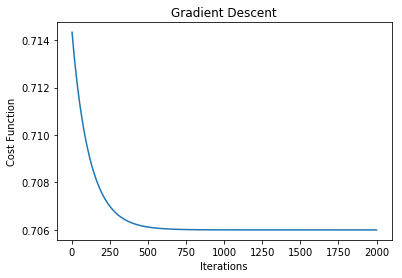

using Gradient descent:
w0= 0.0070360377882373966 ,w1= 0.1513991457075639 ,w2= -0.17979967082703485
RMSE at last 2 iterations= 0.7059962996786332 0.7059962996753223
RMSE and R^2 in the testing set= (0.6781363264895746, 0.5447091627068614)


In [82]:
iteration_list=[i for i in range(1,stop)]
plt.plot(iteration_list,e[1:2000])
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Gradient Descent') 
plt.show()
print("using Gradient descent:")
print ("w0=",w0,",w1=",w1,",w2=",w2)
print ("RMSE at last 2 iterations=",e[1998],e[1999])
print ("RMSE and R^2 in the testing set=",rms(w0,w1,w2))
# print ("R^2 in the testing set=",r2(w0,w1,w2))

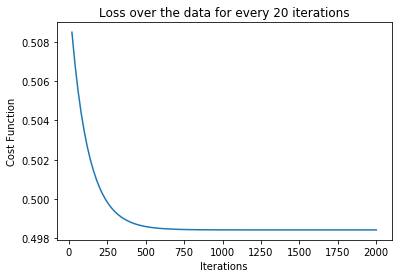

In [83]:
# iteration_list=[i for i in range(1,stop)]
plt.plot(eee,ee)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Loss over the data for every 20 iterations') 
plt.savefig("20.jpg") 
plt.show()